In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import sys
import pandas as pd
import numpy as np

import os
import warnings
warnings.filterwarnings(action='ignore')

import cv2
from google.colab.patches import cv2_imshow


In [55]:
### 사용자 정의 함수
%cd /content/drive/MyDrive/project3/

# Add the paths to the modules to the Python path

sys.path.append(os.path.abspath('./code/image_function'))

from image_load import resize_image, load_image, load_and_resize_images, convert_to_threshold
from vram_reset import reset_vram

# reset_vram() - > vram 초기화

/content/drive/.shortcut-targets-by-id/1gdU-KuXDUU7v2o8X7TdV0JgGiz603mCc/project3


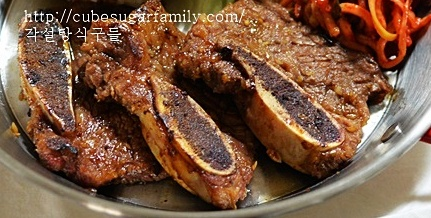

In [30]:
image = cv2.imread('/content/drive/MyDrive/project3/data/traindata/crop_image/구이/갈비구이/Img_000_0002_crop.jpg')
cv2_imshow(image)

In [31]:
image.shape

(218, 431, 3)

In [56]:
## 이미지 파일 불러오는 함수

# 세부 디렉토리 이름 가져오기
def load_image_path(dir):
    food_middle_list = sorted(os.listdir(dir))
    food_list = []  # 음식 이름
    food_path_list = []  # 음식 이름 경로

    for food_middle in food_middle_list:
        middle_path = os.path.join(dir, food_middle)
        food_name_list = os.listdir(middle_path)

        for food in food_name_list:
            path = os.path.join(middle_path, food)
            food_path_list.append(path)
            name = path.split('/')[-1]
            food_list.append(name)

    return food_list, food_path_list

# 세부 디렉토리의 이미지 파일 이름 가져오기
def get_all_image_files(dir):
    img_extensions = {'.jpg', '.jpeg', '.png', '.bmp'}
    image_files = []

    for root, _, files in os.walk(dir):
        for file in files:
            if any(file.lower().endswith(ext) for ext in img_extensions):
                image_files.append(os.path.join(root, file))

    return image_files

In [57]:
raw_dir = '/content/drive/MyDrive/project3/data/traindata/raw_image'
food_list, food_path_list = load_image_path(raw_dir)
image_path = get_all_image_files(food_path_list[0])

print(len(food_list))
print(food_list)
print(food_path_list)
print(image_path[:5])

150
['곱창구이', '닭갈비', '더덕구이', '고등어구이', '떡갈비', '갈치구이', '불고기', '삼겹살', '장어구이', '조개구이', '황태구이', '훈제오리', '조기구이', '갈비구이', '떡국_만두국', '계란국', '무국', '미역국', '북엇국', '시래기국', '콩나물국', '육개장', '젓갈', '과메기', '양념치킨', '콩자반', '편육', '피자', '후라이드치킨', '갓김치', '깍두기', '배추김치', '백김치', '부추김치', '무생채', '열무김치', '오이소박이', '나박김치', '총각김치', '파김치', '숙주나물', '고사리나물', '가지볶음', '미역줄기볶음', '시금치나물', '애호박볶음', '경단', '송편', '꿀떡', '만두', '물냉면', '막국수', '라면', '비빔냉면', '수제비', '열무국수', '잔치국수', '짜장면', '짬뽕', '칼국수', '콩국수', '쫄면', '잡채', '도토리묵', '꽈리고추무침', '도라지무침', '콩나물무침', '홍어무침', '회무침', '김밥', '김치볶음밥', '누룽지', '비빔밥', '유부초밥', '잡곡밥', '알밥', '주먹밥', '새우볶음밥'

In [58]:
def full_image(food_path):

  full_image_path = food_path.replace('crop_image', 'output_image_color')

  if not os.path.exists(full_image_path):
      os.makedirs(full_image_path)

  image_paths = get_all_image_files(food_path)

  for image_path in image_paths:
    size = (224,224)
    base_pic = np.full((size[1],size[0],3), 255)
    image = cv2.imread(image_path)
    h,w = image.shape[:2]
    ash = size[1]/h
    asw = size[0]/w
    if asw < ash :
      sizeas = (int(w*asw),int(h*asw))
    else:
      sizeas = (int(w*ash),int(h*ash))
    image = cv2.resize(image,dsize=sizeas)
    base_pic[int(size[1]/2-sizeas[1]/2):int(size[1]/2+sizeas[1]/2),int(size[0]/2-sizeas[0]/2):int(size[0]/2+sizeas[0]/2),:]=image

    output_image_path = image_path.replace('crop_image', 'output_image_color')
    cv2.imwrite(output_image_path,base_pic)

In [59]:
full_image('/content/drive/MyDrive/project3/data/traindata/crop_image/구이/곱창구이')